<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/Analysing_wine_quality_Statistically.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, let's explore, statistically, wine and it's qualities metrics.

Dataset from UCI:
- https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
for column in df.keys():
  print(f"Column {column} has {len(np.unique(df['pH']))} unique values.")

Column fixed acidity has 89 unique values.
Column volatile acidity has 89 unique values.
Column citric acid has 89 unique values.
Column residual sugar has 89 unique values.
Column chlorides has 89 unique values.
Column free sulfur dioxide has 89 unique values.
Column total sulfur dioxide has 89 unique values.
Column density has 89 unique values.
Column pH has 89 unique values.
Column sulphates has 89 unique values.
Column alcohol has 89 unique values.
Column quality has 89 unique values.


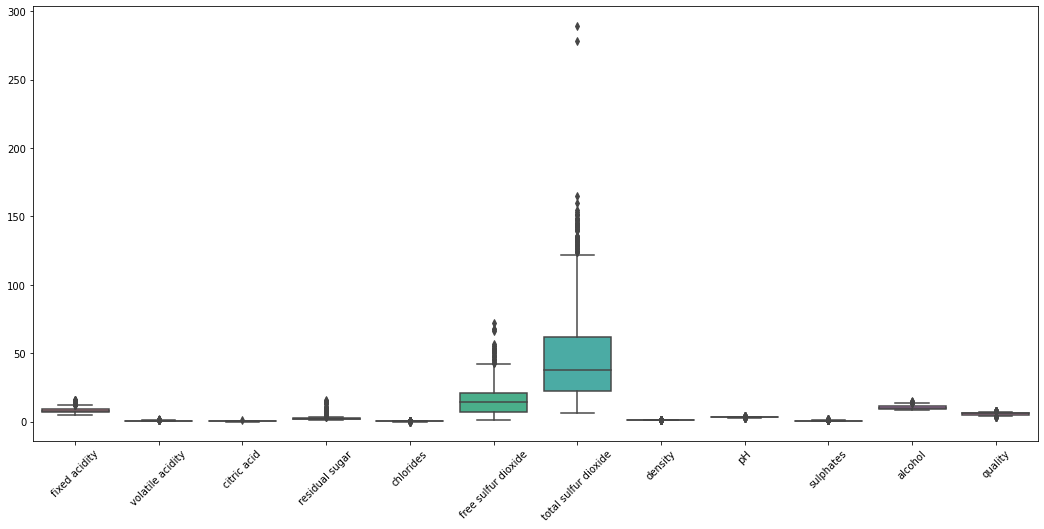

In [11]:
plt.figure(figsize=[18, 8])
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

We can see two possible outlier data points in 'total sulfur dioxide' column.

Let's disconsider this two data points based on the boxplot:

In [15]:
df = df[df['total sulfur dioxide'] < 200]

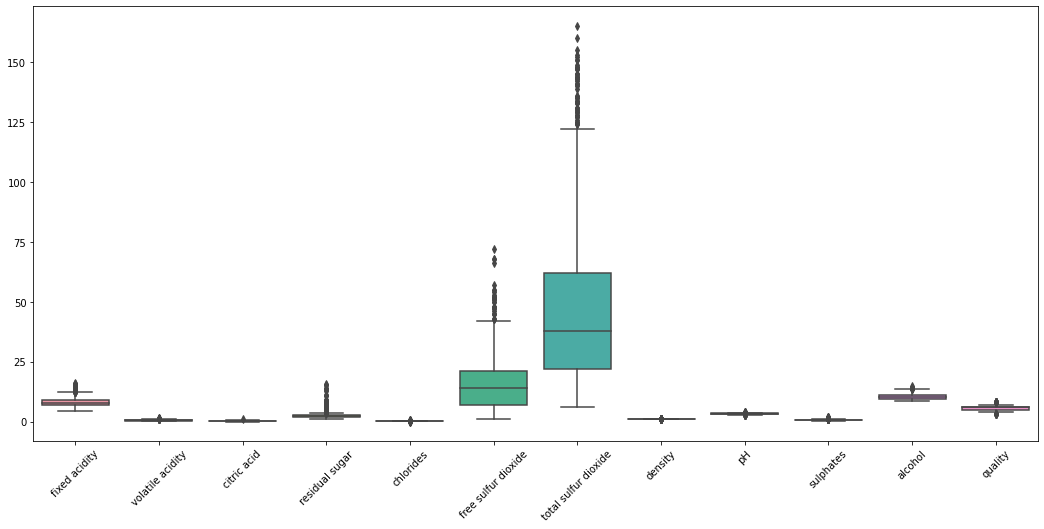

In [16]:
plt.figure(figsize=[18, 8])
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

Done!

# Visual data explorations

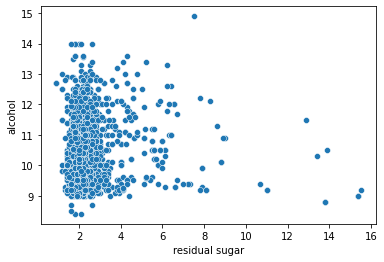

In [17]:
sns.scatterplot(x=df['residual sugar'], y=df['alcohol'])
plt.show()

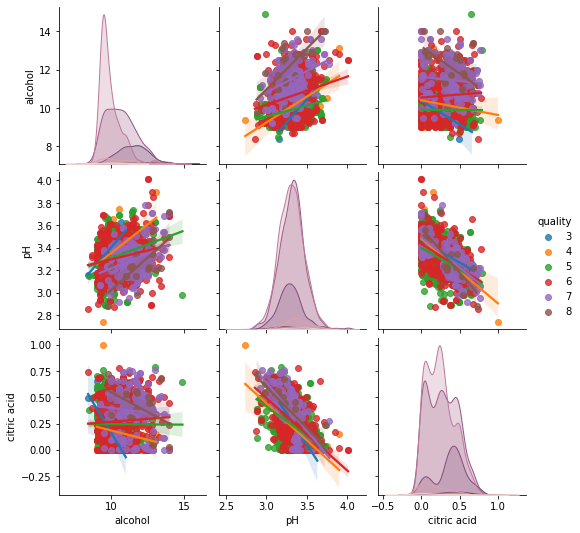

In [23]:
sns.pairplot(df[['alcohol', 'pH', 'citric acid', 'quality']], kind='reg', hue='quality')
plt.show()

# Statistical analysis

Let's use a t-test to investigate whether volatile acidity is different between wines rated as quality 3 (lowest) versus quality 8 (highest).

In [32]:
import scipy.stats as stats

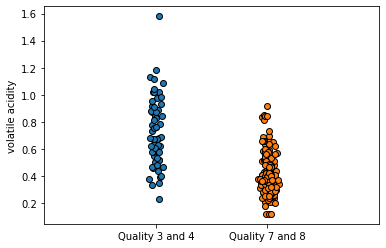

In [46]:
x = df['volatile acidity'][(df['quality'] == 3) | (df['quality'] == 4)]
y = df['volatile acidity'][(df['quality'] == 8) | (df['quality'] == 7)]

plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30+1, y, 'o',
         markeredgecolor='k')

plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Quality 3 and 4', 'Quality 7 and 8'])
plt.ylabel('volatile acidity')
plt.show()

In [45]:
# t-test
ttest = stats.ttest_ind(x, y)
print(ttest)

Ttest_indResult(statistic=12.765504354353604, pvalue=1.215425804161403e-29)


In [36]:
qualcounts = np.zeros(6)

n = 0
for i in range(3, 9): # 3 lowest, 8 highest
  qualcounts[n] = len(df[df['quality'] == i])
  n += 1

qualcounts

array([ 10.,  53., 681., 638., 197.,  18.])

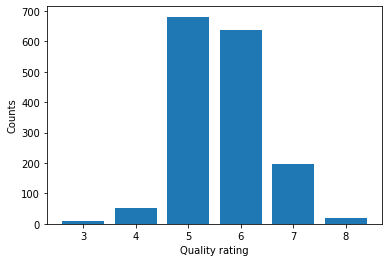

In [38]:
plt.bar(range(3, 9), qualcounts)
plt.xlabel('Quality rating')
plt.ylabel('Counts')
plt.show()

In [48]:
# or...
df['quality'].value_counts()

5    681
6    638
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

# Multiple regression

Performing multiple regression to predict the variability in one variable (quality measure) using a lot of other variables (all features available in our dataset).

I'm going to use statsmodels.api

**If P value is smaller than 0.05, we consider that the feature is significantly predictive of wine quality.**

In [49]:
import statsmodels.api as sm

In [51]:
dependent_variable = df['quality']
independent_variables = df.drop(labels='quality', axis='columns')

In [53]:
dependent_variable

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1597, dtype: int64

In [52]:
independent_variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [56]:
model = sm.OLS(dependent_variable, independent_variables).fit() # endogenous = dependent variable
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                        0.00
Time:                        15:51:47   Log-Likelihood:                         -1564.8
No. Observations:                1597   AIC:                                      3152.
Df Residuals:                    1586   BIC:                                      3211.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

We need an intercept. Without this, the models are difficult to interpret. Let's add a constant to the dataset.

In [57]:
independent_variables = sm.add_constant(independent_variables)
model = sm.OLS(dependent_variable, independent_variables).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          1.30e-145
Time:                        15:52:51   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
model.pvalues < 0.05

const                   False
fixed acidity           False
volatile acidity         True
citric acid             False
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                 False
pH                       True
sulphates                True
alcohol                  True
dtype: bool

In [62]:
significantly_features = list(model.pvalues[model.pvalues < 0.05].keys())
print(significantly_features)

['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']


Now we are going to pairplot considering only significantly features!

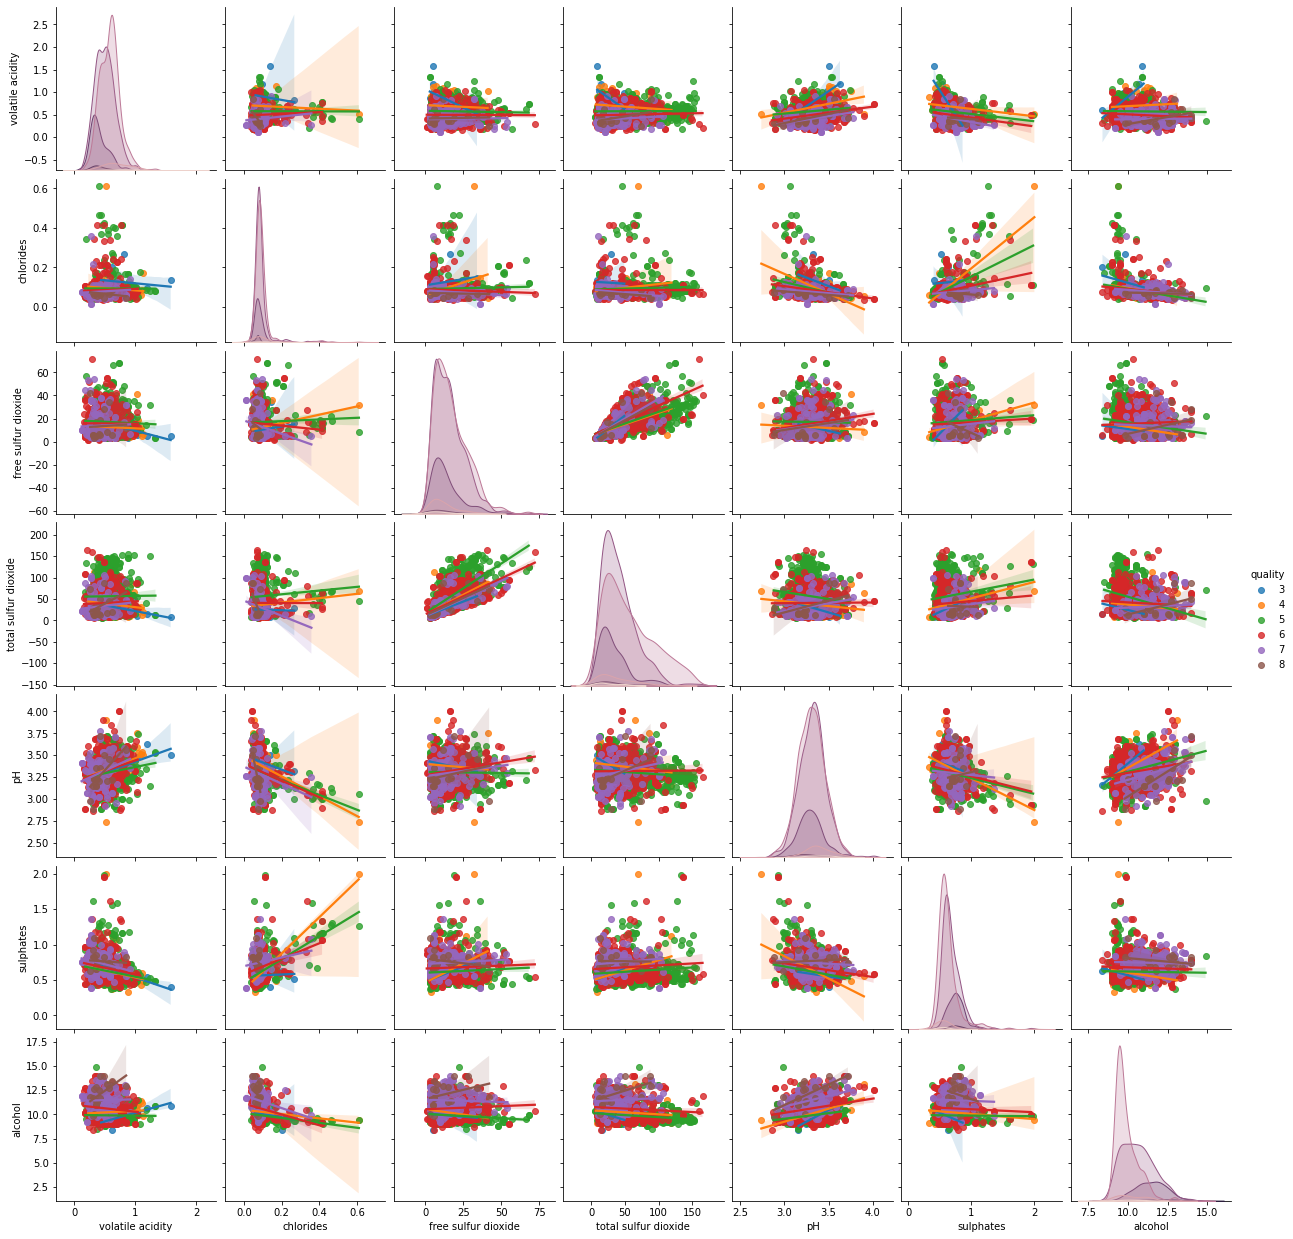

In [64]:
significantly_features.append('quality')
sns.pairplot(df[significantly_features], kind='reg', hue='quality')

# Logistic regression

The distinction (one of) between multiple regression and logistic regression is that, with multiple regression, the dependent variable (quality) has multiple different values (3 to 8), whereas with logistic regression, the prediction is a binary value, (true or falze/ pass or fail, 0 or 1), in other words, a classifier. In our case, if wine has quality or not.

In [67]:
binary_threshold = np.mean(df['quality'])
binary_threshold # mean of all quality scores

5.634314339386349

In [68]:
df['binary threshold'] = df['quality'] > binary_threshold # False for below the mean and True for above the mean
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary threshold
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [71]:
Xcols = []

for key in df.keys():
  if key not in ['quality', 'binary threshold']:
    Xcols.append(key)

Xcols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [73]:
model = sm.Logit(df['binary threshold'], df[Xcols])
results = model.fit(method='newton') 
# for multiple regression, there is only one formula to apply. But with logistic regression, it's more complex, going through an iterative procedure 
# to arrive slowly at a good solution. One of the methods is Newton.

results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       binary threshold   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.2525
Time:                        16:08:07   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [75]:
logistic_significantly_features = list(results.pvalues[results.pvalues < 0.05].keys())

In [80]:
print('Significantly predictors from the multiple regression:')
[print('-' + i) for i in significantly_features];

print('\n Significantly predictors from the logistic regression:')
[print('-' + i) for i in logistic_significantly_features];

Significantly predictors from the multiple regression:
-volatile acidity
-chlorides
-free sulfur dioxide
-total sulfur dioxide
-pH
-sulphates
-alcohol
-quality

 Significantly predictors from the logistic regression:
-volatile acidity
-citric acid
-chlorides
-free sulfur dioxide
-total sulfur dioxide
-density
-sulphates
-alcohol


# Transforming randomic brownian noise into Gaussian

Let's transform non Gaussian distribution into a Gaussian distribution, using this algorithm:
- Create brownian noise;
- Rank transform;
- Scale to (-1 to +1) (lowest is -1, highest is +1)
- Apply inverse hyperbolic tangent

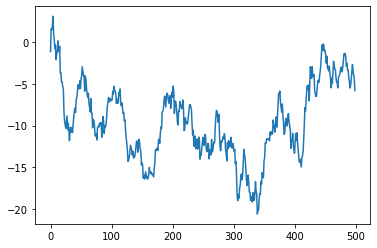

In [82]:
n = 500
x = np.cumsum(np.random.randn(n))
plt.plot(x);

In [84]:
y = stats.rankdata(x)
y

array([482., 498., 497., 499., 500., 496., 495., 488., 492., 472., 476.,
       483., 494., 487., 481., 489., 441., 442., 414., 413., 399., 390.,
       298., 268., 244., 225., 259., 285., 220., 253., 223., 166., 216.,
       230., 214., 228., 211., 247., 276., 299., 313., 294., 352., 356.,
       377., 406., 400., 393., 416., 394., 419., 434., 461., 448., 433.,
       435., 381., 432., 418., 395., 370., 360., 374., 330., 315., 297.,
       354., 291., 290., 227., 272., 269., 241., 193., 194., 203., 172.,
       229., 231., 243., 236., 258., 248., 254., 189., 251., 281., 264.,
       208., 237., 235., 246., 277., 319., 333., 359., 340., 339., 355.,
       347., 346., 351., 382., 369., 401., 388., 383., 372., 331., 353.,
       334., 336., 378., 367., 392., 338., 321., 335., 312., 287., 293.,
       267., 271., 218., 185., 150., 106.,  71.,  74.,  82.,  96., 140.,
       128., 113.,  90., 102.,  79.,  84.,  85.,  95., 130., 163., 162.,
        97., 143., 177., 152., 114., 109.,  63.,  6

In [89]:
# Let's normalize
print('Non normalized:', np.min(y), np.max(y))

y_normalized = (y / (n+1)) * 2 - 1 # from -1 to 1
print('Normalized:', np.min(y_normalized), np.max(y_normalized))

Non normalized: 1.0 500.0
Normalized: -0.9960079840319361 0.996007984031936


In [90]:
y_normalized = np.arctanh(y_normalized)
y_normalized

array([ 1.61675257e+00,  2.55599389e+00,  2.41114783e+00,  2.75972946e+00,
        3.10730405e+00,  2.29856901e+00,  2.20639915e+00,  1.81268302e+00,
        2.00062707e+00,  1.39484158e+00,  1.47327101e+00,  1.64482245e+00,
        2.12831268e+00,  1.77460340e+00,  1.59006750e+00,  1.85372792e+00,
        9.97350157e-01,  1.00688622e+00,  7.79978928e-01,  7.73055389e-01,
        6.81994302e-01,  6.28308269e-01,  1.91943754e-01,  6.99742635e-02,
       -2.59539298e-02, -1.02150232e-01,  3.39451678e-02,  1.38605386e-01,
       -1.22363561e-01,  9.98037128e-03, -1.10224671e-01, -3.51071372e-01,
       -1.38605386e-01, -8.20197560e-02, -1.46753100e-01, -9.00630831e-02,
       -1.59011395e-01, -1.39729652e-02,  1.02150232e-01,  1.96087938e-01,
        2.54880614e-01,  1.75430487e-01,  4.29842435e-01,  4.49098494e-01,
        5.55981811e-01,  7.26238134e-01,  6.88172015e-01,  6.45839192e-01,
        7.94017002e-01,  6.51761037e-01,  8.15575836e-01,  9.34175957e-01,
        1.22225929e+00,  

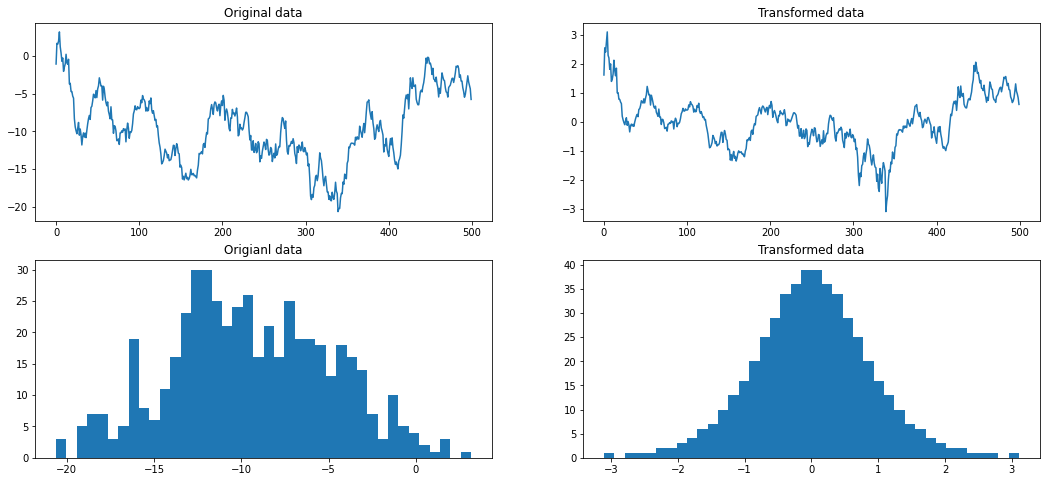

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
ax[0, 0].plot(x)
ax[0, 0].set_title('Original data')
ax[0, 1].plot(y_normalized)
ax[0, 1].set_title('Transformed data')

ax[1, 0].hist(x, bins=40)
ax[1, 0].set_title('Origianl data')
ax[1, 1].hist(y_normalized, bins=40)
ax[1, 1].set_title('Transformed data')

plt.show()

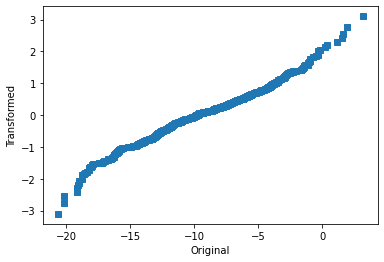

In [94]:
plt.plot(x, y_normalized, 's')
plt.xlabel('Original')
plt.ylabel('Transformed')
plt.show()